In [2]:
import seaborn as sns
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
import seaborn as sns


df = pd.read_csv('../data/gedichtenGGD_STCN_Steur_stripped.csv', sep=';', index_col=0)
print(df.shape)

(3696, 31)


In [3]:
df.groupby('Database')['Database'].count()

Database
KB       3382
STCN      266
Steur      48
Name: Database, dtype: int64

In [ ]:
#df['Alleauteurs'] = df[df.columns[8:30]].apply(
    #lambda x: ', '.join(x.dropna().astype(str)),
    #axis=1)

In [4]:
authors = df['Alleauteurs'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)

In [ ]:
#authors.to_csv('authors.csv', sep=';')

In [5]:
authors.value_counts()

1      2608
2       438
3       169
4        84
5        54
6        51
7        30
8        18
10       14
9        13
12       11
13        7
14        7
11        6
16        6
15        5
21        5
17        4
27        3
33        3
19        3
18        2
26        2
28        2
20        1
22        1
65        1
73        1
38        1
42        1
102       1
108       1
114       1
61        1
79        1
25        1
43        1
47        1
49        1
167       1
dtype: int64

In [5]:
authors.sum(axis = 0, skipna = True)

7681

In [6]:
authors.count()

3561

In [7]:
printers = df.groupby('Drukker')['Drukker'].count().sort_values(ascending=False)

In [ ]:
#printers.to_csv('printers.csv', sep=';')

In [8]:
printers.value_counts()

1      330
2      121
3       49
4       33
5       22
6       19
7       14
8       10
9        6
11       3
15       3
10       3
12       3
19       2
17       2
13       2
122      1
94       1
16       1
18       1
21       1
23       1
49       1
59       1
74       1
92       1
14       1
Name: Drukker, dtype: int64

In [9]:
couples = df.groupby('Bruidspaar')['Bruidspaar'].count().sort_values(ascending=False)

In [10]:
couples.sum(axis = 0, skipna = True)

3696

In [11]:
couples.count()

3302

In [ ]:
#df1.to_csv('Allebruidsparen.csv', sep='\t')

In [12]:
df.head()

,Database,Jaar,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,Auteur14,Auteur15,Auteur16,Auteur17,Auteur18,Auteur19,Auteur20,Auteur21,Auteur22,Alleauteurs
0,,,,,,,,,,,,,,,,,,,,,
1111,KB,1600.0,Guilielmus Martigny,Anna Brederode,Guilielmus Martigny & Anna Brederode,Aelbrecht Hendricksz,s-Gravenhage,NaN,Hugo de Groot,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hugo de Groot
1112,KB,1600.0,Guilielmus Martigny,Anna Brederode,Guilielmus Martigny & Anna Brederode,Aelbrecht Hendricksz,s-Gravenhage,Amsterdam,Johannes Meursius,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Johannes Meursius
676,KB,1601.0,Nicolaas van Hyc,Margareta van den Berch,Nicolaas van Hyc & Margareta van den Berch,Thomas Basson,Leiden,Haarlem,Joachim Cranendonck,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joachim Cranendonck
1039,KB,1601.0,Henricus van Cranenburg,Johanna van Nieupoort,Henricus van Cranenburg & Johanna van Nieupoort,Christoffel Guyot,Leiden,NaN,Henricus Jonckheyn,Arnoldus And. Pagius,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Henricus Jonckheyn, Arnoldus And. Pagius"
1040,KB,1602.0,Hugo Laurentius Swaenwijck,Janneken Cornelisd Vroesen,Hugo Laurentius Swaenwijck & Janneken Cornelis...,Christoffel Guyot,Leiden,Amsterdam,Matthaeus Adriaensz Burgius,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matthaeus Adriaensz Burgius


In [13]:
df_year = df[(df['Jaar'] >= 1600)
& (df['Jaar'] <= 1760)]

/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Number of booklets per year')

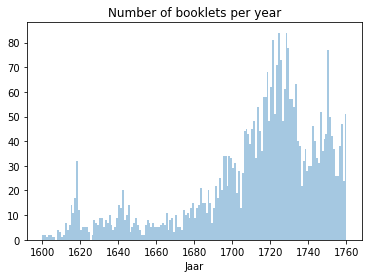

In [14]:
sns.distplot(df_year['Jaar'], kde=False, bins=160)
plt.title('Number of booklets per year')
# plt.savefig('histyear.png', dpi=300)

In [15]:
df.isna().sum()

Database              0
Jaar                 17
Bruidegom             0
Bruid                 0
Bruidspaar            0
Drukker            1565
Plaats_druk        1572
Plaats_huwelijk     918
Auteur1             662
Auteur2            2203
Auteur3            2660
Auteur4            2994
Auteur5            3220
Auteur6            3364
Auteur7            3474
Auteur8            3549
Auteur9            3594
Auteur10           3639
Auteur11           3662
Auteur12           3675
Auteur13           3686
Auteur14           3689
Auteur15           3691
Auteur16           3695
Auteur17           3695
Auteur18           3695
Auteur19           3695
Auteur20           3695
Auteur21           3695
Auteur22           3695
Alleauteurs         662
dtype: int64

In [6]:
df['n_authors'] = df.loc[:, 'Auteur1':'Auteur22'].count(axis=1)

In [41]:
df_authors_year = df[df['n_authors'] != 0]

In [42]:
n_authors_year = df_authors_year.groupby('Jaar')['n_authors'].mean()

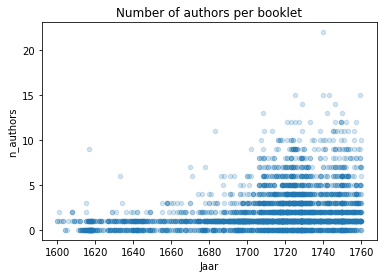

In [46]:
import seaborn as sns
df.plot.scatter(x="Jaar", y="n_authors", alpha=0.2)
plt.title('Number of authors per booklet')
plt.savefig('n_authors.png', dpi=300)

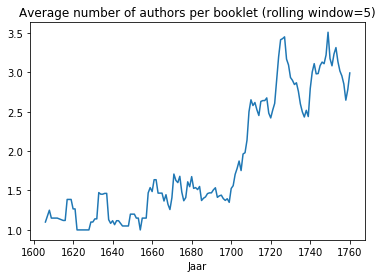

In [48]:
n_authors_year.rolling(window=5).mean().plot()
plt.title('Average number of authors per booklet (rolling window=5)')
plt.savefig('n_authors_rolling_without_0.png', dpi=300)

In [12]:
df[['firstname_bride', 'lastname_bride']] = df.Bruid.str.rsplit(' ', 1, expand=True)
df[['firstname_groom', 'lastname_groom']] = df.Bruidegom.str.rsplit(' ', 1, expand=True)
df[['firstname_printer', 'lastname_printer']] = df.Drukker.str.rsplit(' ', 1, expand=True)

In [13]:
df['bride_authors'] = df.fillna('').apply(lambda row: row['lastname_bride'] in row['Alleauteurs'], axis=1)
df['groom_authors'] = df.fillna('').apply(lambda row: row['lastname_groom'] in row['Alleauteurs'], axis=1)
df['bride_printer'] = df.fillna('').apply(lambda row: row['lastname_bride'] in row['Drukker'], axis=1)
df['groom_printer'] = df.fillna('').apply(lambda row: row['lastname_groom'] in row['Drukker'], axis=1)
df['Printer_authors'] = df.fillna('').apply(lambda row: row['Drukker'] in row['Alleauteurs'], axis=1)

In [14]:
df.head()

,Database,Jaar,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,lastname_bride,firstname_groom,lastname_groom,firstname_printer,lastname_printer,bride_authors,groom_authors,bride_printer,groom_printer,Printer_authors
0,,,,,,,,,,,,,,,,,,,,,
1111,KB,1600.0,Guilielmus Martigny,Anna Brederode,Guilielmus Martigny & Anna Brederode,Aelbrecht Hendricksz,s-Gravenhage,NaN,Hugo de Groot,NaN,...,Brederode,Guilielmus,Martigny,Aelbrecht,Hendricksz,False,False,False,False,False
1112,KB,1600.0,Guilielmus Martigny,Anna Brederode,Guilielmus Martigny & Anna Brederode,Aelbrecht Hendricksz,s-Gravenhage,Amsterdam,Johannes Meursius,NaN,...,Brederode,Guilielmus,Martigny,Aelbrecht,Hendricksz,False,False,False,False,False
676,KB,1601.0,Nicolaas van Hyc,Margareta van den Berch,Nicolaas van Hyc & Margareta van den Berch,Thomas Basson,Leiden,Haarlem,Joachim Cranendonck,NaN,...,Berch,Nicolaas van,Hyc,Thomas,Basson,False,False,False,False,False
1039,KB,1601.0,Henricus van Cranenburg,Johanna van Nieupoort,Henricus van Cranenburg & Johanna van Nieupoort,Christoffel Guyot,Leiden,NaN,Henricus Jonckheyn,Arnoldus And. Pagius,...,Nieupoort,Henricus van,Cranenburg,Christoffel,Guyot,False,False,False,False,False
1040,KB,1602.0,Hugo Laurentius Swaenwijck,Janneken Cornelisd Vroesen,Hugo Laurentius Swaenwijck & Janneken Cornelis...,Christoffel Guyot,Leiden,Amsterdam,Matthaeus Adriaensz Burgius,NaN,...,Vroesen,Hugo Laurentius,Swaenwijck,Christoffel,Guyot,False,False,False,False,False


In [15]:
print(df.groupby('bride_authors')['bride_authors'].count())
print(df.groupby('groom_authors')['groom_authors'].count())
print(df.groupby('bride_printer')['bride_printer'].count())
print(df.groupby('groom_printer')['groom_printer'].count())
print(df.groupby('Printer_authors')['Printer_authors'].count())

bride_authors
False    3273
True      423
Name: bride_authors, dtype: int64
groom_authors
False    3145
True      551
Name: groom_authors, dtype: int64
bride_printer
False    3680
True       16
Name: bride_printer, dtype: int64
groom_printer
False    3672
True       24
Name: groom_printer, dtype: int64
Printer_authors
False    1780
True     1916
Name: Printer_authors, dtype: int64


In [39]:
df2 = df[df['bride_authors']==True]

In [40]:
df2.groupby('lastname_bride')['lastname_bride'].count().sort_values(ascending=False)

lastname_bride
Bruyn         6
Veen          4
Pielat        3
Sart          3
Schutte       3
Hollebeek     3
Brandt        3
Hoffham       3
Ryser         3
Huydecoper    3
Makreel       2
Burlett       2
Strengh       2
Suderman      2
Breur         2
Heems         2
Have          2
Bosch         2
Terwen        2
Lomannus      2
Sluys         2
Meulen        2
Buys          2
Thin          2
Michell       2
Scholten      2
Croese        2
Muilman       2
Muller        2
Nolk          2
             ..
Preyger       1
Orsoy         1
Raap          1
Ravesteyn     1
Regt          1
Reitz         1
Rensselaar    1
Reus          1
Ribbius       1
Os            1
Ordykus       1
Mol           1
Nolthenius    1
Moonen        1
Mooy          1
Mortier       1
Moubach       1
Mulier        1
Nessing       1
Nispen        1
Noppen        1
Oostrum       1
Noël          1
Obrenan       1
Ojers         1
Oort          1
Oosten        1
Oosterdyk     1
Oosterhout    1
Abels         1
Name: las

In [51]:
df3 = df[df['Printer_authors']==True]
df3.groupby('Drukker')['Drukker'].count().sort_values(ascending=False)

Drukker
Joannes Oosterwyk                   94
Hendrik van de Gaete                53
Lescailje                           34
Joannes van Braam                   17
Geldorp                             12
Arnold Willis                       12
Goeree                               7
Joris van der Woude                  6
Petrus Dathenus                      5
Hendrik Sligtenhorst                 4
François Halma                       4
David Ruarus                         4
Johannes Rotterdam                   4
Abraham Blussé                       4
Hendrik Bosch                        4
Wetstein                             4
Arnoldus Lobedanius                  3
Willem Barents                       3
Cornelis Lelivelt                    3
Johan van Doesburg                   3
Reinier Boitet                       3
Arnoldus Olofsen                     2
Hendrik Callenbach                   2
Hendrik Smets                        2
Gijsbert Rijkman                     2
Hendrik Stockinck

In [50]:
df4 = df[df['groom_printer']==True]
df4.groupby('lastname_groom')['lastname_groom'].count().sort_values(ascending=False)

lastname_groom
Groot         2
Elzevier      1
Aertsz        1
Bos           1
Broen         1
Bruyn         1
Casteleyn     1
Castricum     1
Commelin      1
Damme         1
Duim          1
Willis        1
Wetstein      1
Hackius       1
Heuvel        1
Hulkenroy     1
Klinkhamer    1
Leeuwen       1
Poolsum       1
Ribbius       1
Scheltus      1
Schouten      1
Aardenberg    1
Name: lastname_groom, dtype: int64

In [68]:
df5 = df.groupby(['Jaar', 'Bruidspaar'])['Bruidspaar'].count().sort_values(ascending=False)

In [69]:
df5.head()

Jaar    Bruidspaar                                                     
1756.0  Lieve Geelvinck (1730-1757) & Catharina Elisabeth Hasselaer        5
1753.0  Joan Frederik d' Orville & Maria Philippina Schryver               5
1728.0  Jan Six (1668-1750) & Anna Elisabeth van den Bempden               5
1750.0  Christian Scholten van Aschat & Johanna Catharina van Wesele       5
1718.0  Herman Vingerhoedt (1697-1762) & Johanna Ignatia van der Hoeven    4
Name: Bruidspaar, dtype: int64

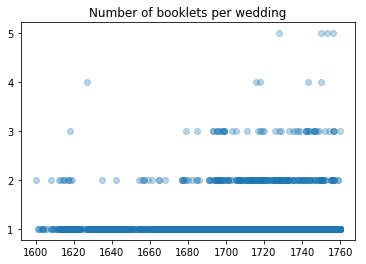

In [80]:
import numpy as np
plt.scatter(x=df5.index.get_level_values(0), y=df5.values, alpha=0.3)
plt.yticks(np.arange(1, 6, step=1))
plt.title('Number of booklets per wedding')
plt.savefig('n_booklets_wedding.png', dpi=300)